<a href="https://colab.research.google.com/github/judyschen/Portfolio/blob/main/Websites_e_comerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/judyschen/Portfolio.git

fatal: destination path 'Profolio' already exists and is not an empty directory.


In [ ]:
data = pd.read_csv('Portfolio/E-commerce Website Logs new.csv')

<ipython-input-47-2f8bfdfe721a>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Profolio/E-commerce Website Logs new.csv')


In [ ]:
data.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


In [ ]:
# 將行名從 'accessed_Ffom' 改為 'accessed_from'
data = data.rename(columns={'accessed_Ffom': 'accessed_from'})
data.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_from,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.96,No,0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.94,No,0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.62,No,0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9.575.775,No,0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0,Cash


In [ ]:
# 檢查資料中是否有缺失值
missing_values = data.isnull().sum()

# 輸出缺失值的統計資訊
print("Missing values count:")
print(missing_values)

Missing values count:
accessed_date       0
duration_(secs)     0
network_protocol    0
ip                  0
bytes               0
accessed_from       0
age                 0
gender              0
country             0
membership          0
language            0
sales               0
returned            0
returned_amount     0
pay_method          0
dtype: int64


We can see that the 'sales' column is vague. The fourth column appears to contain a strange number, '9,575,775'. I will transform the format later.

Then, let's check the data type. There is 172838 data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   accessed_date     172838 non-null  object
 1   duration_(secs)   172838 non-null  int64 
 2   network_protocol  172838 non-null  object
 3   ip                172838 non-null  object
 4   bytes             172838 non-null  int64 
 5   accessed_from     172838 non-null  object
 6   age               172838 non-null  object
 7   gender            172838 non-null  object
 8   country           172838 non-null  object
 9   membership        172838 non-null  object
 10  language          172838 non-null  object
 11  sales             172838 non-null  object
 12  returned          172838 non-null  object
 13  returned_amount   172838 non-null  object
 14  pay_method        172838 non-null  object
dtypes: int64(2), object(13)
memory usage: 19.8+ MB


Since we might want to analyze data with dates, I transformed the date type into a date format.

In [ ]:
# Make a new column that the date become date format
data['accessed_date'] = pd.to_datetime(data['accessed_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   accessed_date     172838 non-null  datetime64[ns]
 1   duration_(secs)   172838 non-null  int64         
 2   network_protocol  172838 non-null  object        
 3   ip                172838 non-null  object        
 4   bytes             172838 non-null  int64         
 5   accessed_from     172838 non-null  object        
 6   age               172838 non-null  object        
 7   gender            172838 non-null  object        
 8   country           172838 non-null  object        
 9   membership        172838 non-null  object        
 10  language          172838 non-null  object        
 11  sales             172838 non-null  object        
 12  returned          172838 non-null  object        
 13  returned_amount   172838 non-null  object        
 14  pay_

接下來，我將討論「年齡」列，該列目前採用物件格式。 我的目標是將其轉換為數字格式。 此外，我將透過以中位數年齡（21 歲）取代缺失值來處理缺失值以及負數值。

Now, let's address the 'sale' and 'returned_amount' column, which is in an object format with weird numbers, such as '9.575.775'. After observation, I found that the correct number should be 9,575.775. Let's perform some transformations and convert it into a numeric format.

In [ ]:
# Replace '--' to NaN
data['age'] = data['age'].replace('--', np.nan)

# convert age into numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# calculate median number
median_age = data['age'].median()

# replace NaN into median
data['age'].fillna(median_age, inplace=True)

# Replace negative age with median age
data['age'] = data['age'].apply(lambda x: median_age if x < 0 else x)

# Also, convert age into integer format
data['age'] = data['age'].astype(int)

# print median
print("median_age:", median_age)


median_age: 21.0


In [ ]:
# 找到最大年齡和最小年齡
max_age = data['age'].max()
min_age = data['age'].min()

# 輸出結果
print("最大年齡:", max_age)
print("最小年齡:", min_age)

最大年齡: 69
最小年齡: 0


In [ ]:
# define a value
def fix_number_format(value):
    # add a conditional
    if value.count('.') >= 2:
        corrected_value = value.replace('.', ',', 1)
        return corrected_value
    else:
        return value

# 对包含该格式的列应用函数
data['sales'] = data['sales'].apply(fix_number_format)
data['returned_amount'] = data['returned_amount'].apply(fix_number_format)

# 将修正后的数据转换为数字格式
data['sales'] = pd.to_numeric(data['sales'].str.replace(',', ''))
data['returned_amount'] = pd.to_numeric(data['returned_amount'].str.replace(',', ''))

In [ ]:
data.head()

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_from,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.960,No,0.0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.940,No,0.0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.620,No,0.0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9575.775,No,0.0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0.0,Cash


Check the data format again, it looks good now!

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   accessed_date     172838 non-null  datetime64[ns]
 1   duration_(secs)   172838 non-null  int64         
 2   network_protocol  172838 non-null  object        
 3   ip                172838 non-null  object        
 4   bytes             172838 non-null  int64         
 5   accessed_from     172838 non-null  object        
 6   age               172838 non-null  int64         
 7   gender            172838 non-null  object        
 8   country           172838 non-null  object        
 9   membership        172838 non-null  object        
 10  language          172838 non-null  object        
 11  sales             172838 non-null  float64       
 12  returned          172838 non-null  object        
 13  returned_amount   172838 non-null  float64       
 14  pay_

#圖形探索

##1 銷售趨勢

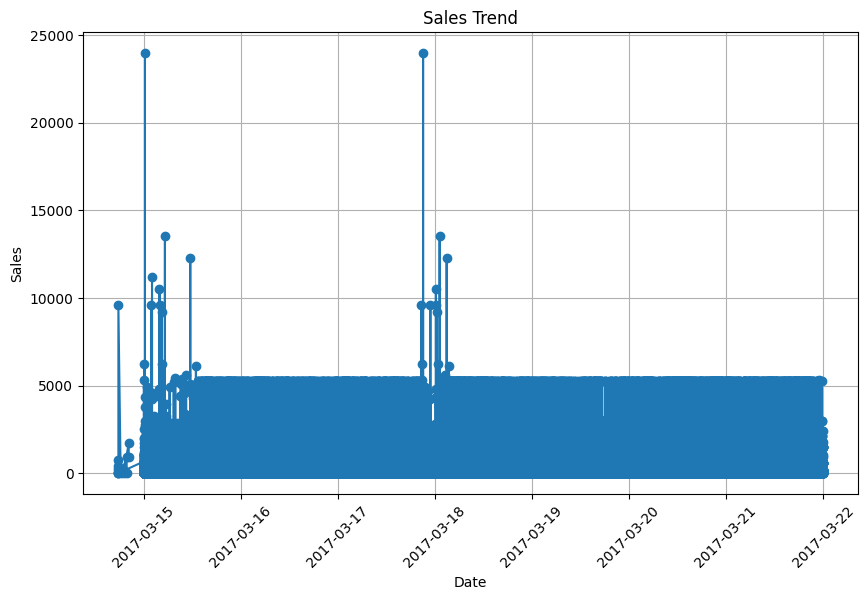

In [ ]:
# line plot
plt.figure(figsize=(10, 6))
plt.plot(data['accessed_date'], data['sales'], marker='o', linestyle='-')


plt.title('Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

# transpose date
plt.xticks(rotation=45)


plt.grid(True)

# 显示图形
plt.show()


## 年齡與銷售

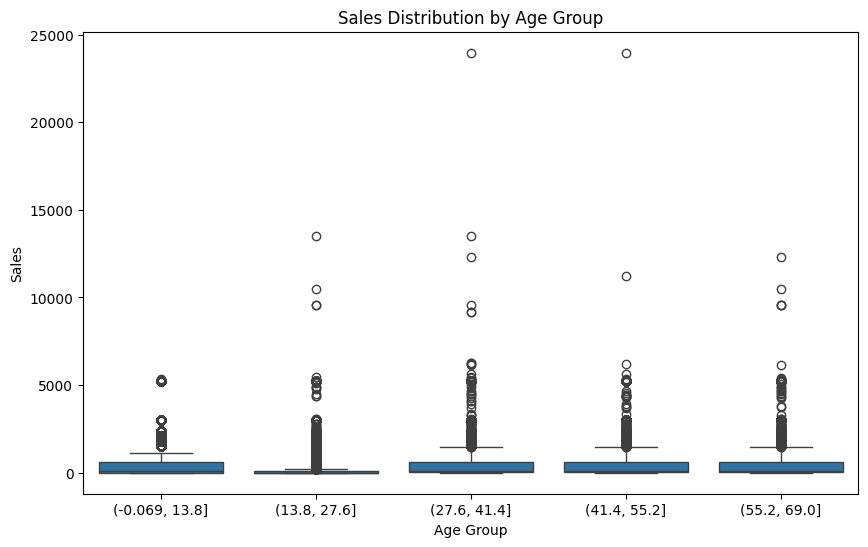

In [ ]:
# 將年齡數據分組為不同的區間
data['age_group'] = pd.cut(data['age'], bins=5)  # 將年齡分成5個區間

# 使用Seaborn繪製箱形圖
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='sales', data=data)

# 設置標題和軸標籤
plt.title('Sales Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sales')

# 顯示圖形
plt.show()

## 性別與銷售

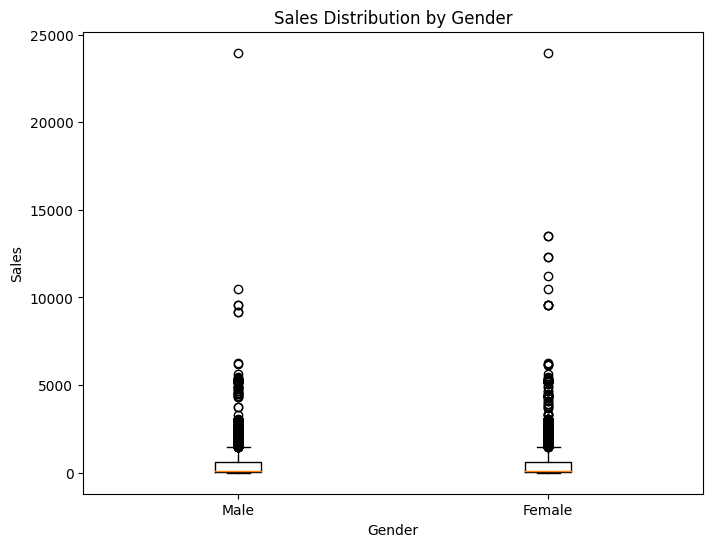

In [ ]:
import matplotlib.pyplot as plt

# 創建箱形圖
plt.figure(figsize=(8, 6))
plt.boxplot([data[data['gender'] == 'Male']['sales'], data[data['gender'] == 'Female']['sales']],
            labels=['Male', 'Female'])

# 設置標題和軸標籤
plt.title('Sales Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Sales')

# 顯示圖形
plt.show()

#Building Model and Machine Learning

When evaluating a model, the next steps depend on the performance metrics and the context of your problem. In this case, the mean squared error (MSE) is quite high, and the R^2 score is close to zero or negative, indicating that the model's predictions are not accurate and do not explain much of the variance in the data.

In [ ]:
# Convert 'returned' into dummy variables
dummy_returned = pd.get_dummies(data['returned'], drop_first=True)  # drop_first=True to avoid multicollinearity
data.head()


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_from,age,gender,country,membership,language,sales,returned,returned_amount,pay_method,age_group
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.960,No,0.0,Credit Card,"(27.6, 41.4]"
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.940,No,0.0,Debit Card,"(13.8, 27.6]"
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.620,No,0.0,Cash,"(13.8, 27.6]"
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9575.775,No,0.0,Credit Card,"(55.2, 69.0]"
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0.0,Cash,"(41.4, 55.2]"


#Liner Regression

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'membership' column
X['membership_encoded'] = label_encoder.fit_transform(X['membership'])

# Drop the original 'membership' column
X.drop('membership', axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

NameError: name 'X' is not defined

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target variable (y)
X = data[['membership_encoded']]  # You can include more features if needed
y = data[['sales']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Accuracy: The proportion of correctly classified instances among the total instances. In your case, it means that approximately 89.23% of the instances are correctly classified.

Precision: The proportion of true positive predictions among all positive predictions made by the model. In your case, it means that around 54.55% of the instances predicted as positive are actually positive.

Recall: Also known as sensitivity or true positive rate, it measures the proportion of true positive predictions among all actual positive instances. A recall of 1.0 means that all positive instances are correctly identified by the model.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. In your case, it's approximately 70.59%.

Mean Squared Error (MSE): The average squared difference between the predicted values and the actual values. It measures the average of the squares of the errors. In your case, it's 0.1077.

R^2 Score: Also known as the coefficient of determination, it represents the proportion of the variance in the dependent variable that is predictable from the independent variables. In your case, it's 0.0431, which indicates a low predictive power of the model.

Overall, the model seems to have a high accuracy, but the precision is relatively low, indicating that there might be a higher false positive rate. Additionally, the recall is 1.0, suggesting that the model correctly identifies all actual positive instances, but this needs to be balanced with precision to avoid overfitting. The F1-score provides a harmonic mean between precision and recall, giving a balanced measure of the model's performance. The MSE and R^2 score provide insights into the model's predictive accuracy and explainability, respectively.





In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = data[['duration_(secs)']]  # Example features
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1)  # Set the regularization parameter (alpha) as needed

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Ridge Regression):", mse)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = data[['duration_(secs)', 'age']]  # Example features
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=500)  # Set the regularization parameter (alpha) as needed

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Lasso Regression):", mse)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define features (X) and target variable (y)
X = data[['duration_(secs)']]  # You can include more features if needed
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression - Mean Squared Error:", mse_dt)
print("Decision Tree Regression - R^2 Score:", r2_dt)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression - Mean Squared Error:", mse_rf)
print("Random Forest Regression - R^2 Score:", r2_rf)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the gradient boosting regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=500, random_state=42)

# Train the model on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression - Mean Squared Error:", mse_gb)
print("Gradient Boosting Regression - R^2 Score:", r2_gb)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are your feature matrix and target variable
X = data[['duration_(secs)']].values
y = data['sales'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)
